In [1]:
# ----------------------------------------------------------
# COVID-19 DATA ANALYSIS PROJECT (GOOGLE COLAB READY)
# ----------------------------------------------------------

# Install required libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

# -----------------------------------------
# 1️⃣ Upload CSV file
# -----------------------------------------
print("📂 Upload your COVID-19 dataset (CSV format)")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# -----------------------------------------
# 2️⃣ Display & Clean Data
# -----------------------------------------
print("\n📊 First 5 rows of dataset:")
display(df.head())

print("\n🧹 Checking missing values:")
display(df.isnull().sum())

# Fill missing values with 0
df.fillna(0, inplace=True)

# Ensure date is in proper format
df['Date'] = pd.to_datetime(df['Date'])

# -----------------------------------------
# 3️⃣ Compute Cumulative Cases per Country
# -----------------------------------------
df = df.sort_values(by=["Country", "Date"])

df['Cumulative_Confirmed'] = df.groupby("Country")['Confirmed'].cumsum()
df['Cumulative_Recovered'] = df.groupby("Country")['Recovered'].cumsum()
df['Cumulative_Deaths'] = df.groupby("Country")['Deaths'].cumsum()

print("\n✅ Cumulative data added!")
display(df.head())

# -----------------------------------------
# 4️⃣ Select Countries for Visualization
# -----------------------------------------
countries = ["India", "US", "Brazil", "Italy"]   # You can change this

df_selected = df[df["Country"].isin(countries)]

# -----------------------------------------
# 5️⃣ Line Plot – Cumulative COVID Cases
# -----------------------------------------
plt.figure(figsize=(12,6))

for country in countries:
    temp = df_selected[df_selected["Country"] == country]
    plt.plot(temp["Date"], temp["Cumulative_Confirmed"], label=country)

plt.title("Cumulative Confirmed COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------
# 6️⃣ Area Chart – Recoveries vs Deaths
# -----------------------------------------
plt.figure(figsize=(12,6))

india_data = df[df["Country"] == "India"]

plt.stackplot(
    india_data["Date"],
    india_data["Cumulative_Recovered"],
    india_data["Cumulative_Deaths"],
    labels=["Recovered", "Deaths"]
)

plt.title("India: Recoveries vs Deaths (Area Chart)")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend()
plt.show()

# -----------------------------------------
# 7️⃣ Heatmap – Correlation Between Metrics
# -----------------------------------------
plt.figure(figsize=(8,5))
corr = df[["Confirmed", "Recovered", "Deaths"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for COVID-19 Metrics")
plt.show()

# -----------------------------------------
# 8️⃣ Final Output
# -----------------------------------------
print("✅ COVID-19 Analysis Completed!")
print("📈 Visualizations generated successfully.")


📂 Upload your COVID-19 dataset (CSV format)


Saving archive.zip to archive.zip


ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'full_grouped.csv', 'usa_county_wise.csv', 'worldometer_data.csv']

In [2]:
# -----------------------------------------------------
# STEP 1: Upload ZIP file
# -----------------------------------------------------
from google.colab import files
import zipfile
import pandas as pd

print("📂 Upload your ZIP file containing COVID CSVs")
uploaded = files.upload()

zip_file = list(uploaded.keys())[0]

# -----------------------------------------------------
# STEP 2: Extract ZIP into /content/
# -----------------------------------------------------
with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall("covid_data")

print("\n📁 Extracted files:")
import os
print(os.listdir("covid_data"))


📂 Upload your ZIP file containing COVID CSVs


Saving archive.zip to archive (1).zip

📁 Extracted files:
['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'worldometer_data.csv', 'full_grouped.csv', 'usa_county_wise.csv']


In [3]:
df = pd.read_csv("covid_data/covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


📂 Upload your COVID-19 ZIP dataset


Saving archive.zip to archive (2).zip
📁 Extracted files: ['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'worldometer_data.csv', 'full_grouped.csv', 'usa_county_wise.csv']

First rows:


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


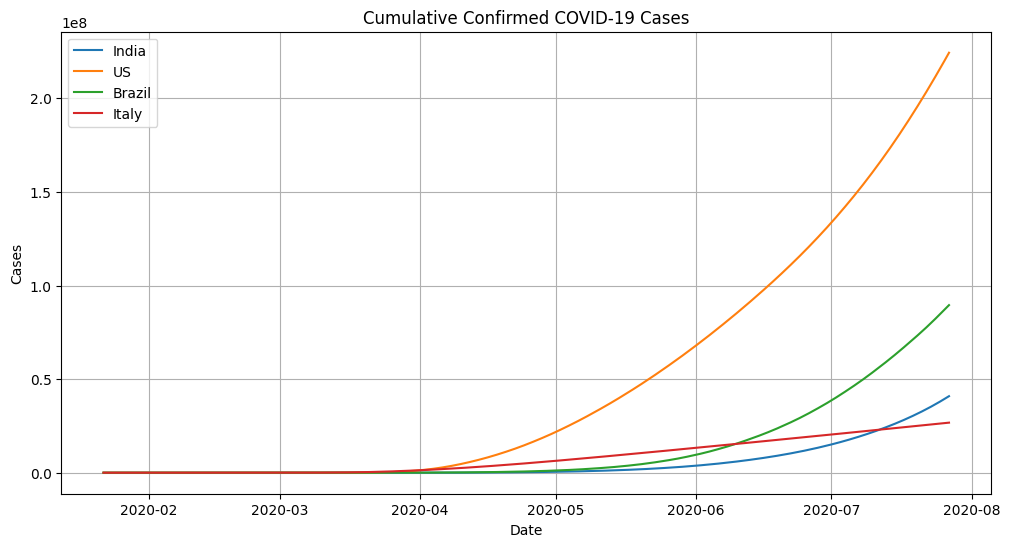

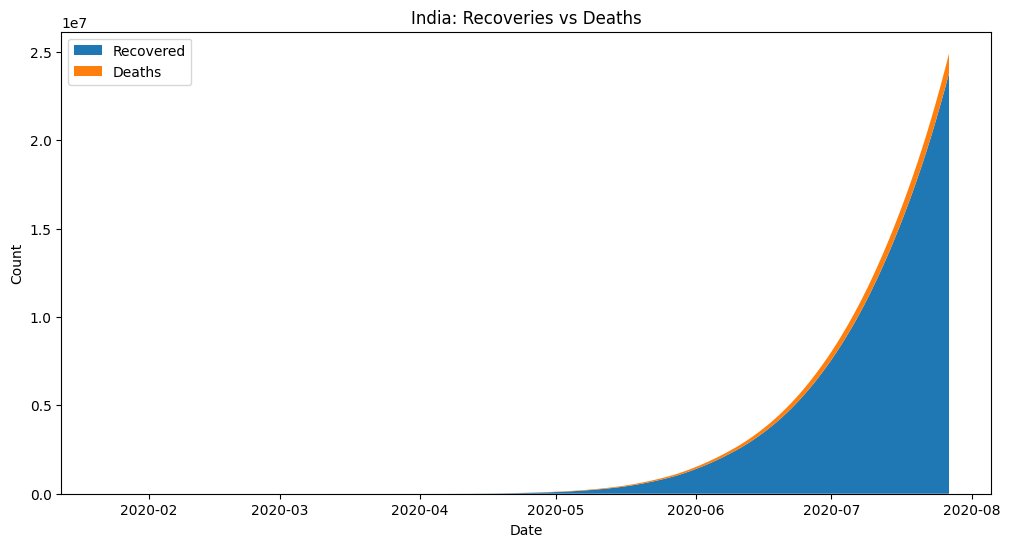

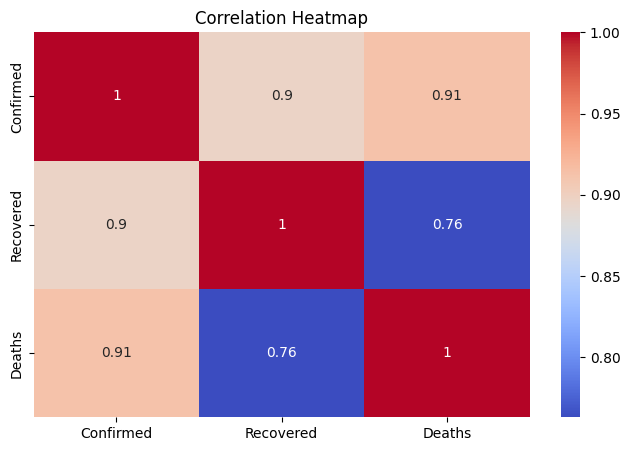

✅ Analysis Completed!


In [4]:
# ----------------------------------------------------------
# INSTALL LIBRARIES
# ----------------------------------------------------------
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import files

# ----------------------------------------------------------
# 1️⃣ UPLOAD ZIP
# ----------------------------------------------------------
print("📂 Upload your COVID-19 ZIP dataset")
uploaded = files.upload()

zip_file = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall("covid_data")

print("📁 Extracted files:", os.listdir("covid_data"))

# ----------------------------------------------------------
# 2️⃣ LOAD ONE CSV FILE
# ----------------------------------------------------------
df = pd.read_csv("covid_data/covid_19_clean_complete.csv")
print("\nFirst rows:")
display(df.head())

# ----------------------------------------------------------
# 3️⃣ CLEAN & PREPARE DATA
# ----------------------------------------------------------
df.fillna(0, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

df = df.rename(columns={
    'Confirmed': 'Confirmed',
    'Recovered': 'Recovered',
    'Deaths': 'Deaths',
    'Country/Region': 'Country'
})

df = df.sort_values(by=["Country", "Date"])

df['Cumulative_Confirmed'] = df.groupby("Country")['Confirmed'].cumsum()
df['Cumulative_Recovered'] = df.groupby("Country")['Recovered'].cumsum()
df['Cumulative_Deaths'] = df.groupby("Country")['Deaths'].cumsum()

# ----------------------------------------------------------
# 4️⃣ VISUALIZATION
# ----------------------------------------------------------
countries = ["India", "US", "Brazil", "Italy"]

plt.figure(figsize=(12,6))
for country in countries:
    temp = df[df["Country"] == country]
    plt.plot(temp["Date"], temp["Cumulative_Confirmed"], label=country)

plt.title("Cumulative Confirmed COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(True)
plt.legend()
plt.show()

# Area chart for India
india = df[df["Country"] == "India"]
plt.figure(figsize=(12,6))
plt.stackplot(india["Date"], india["Cumulative_Recovered"], india["Cumulative_Deaths"],
              labels=["Recovered", "Deaths"])
plt.title("India: Recoveries vs Deaths")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

# Heatmap
plt.figure(figsize=(8,5))
corr = df[["Confirmed", "Recovered", "Deaths"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("✅ Analysis Completed!")
